# COMP4660/8420 Lab 2.1 - Using PyTorch for Binary Classification

In this lab, you will build your own neural network to perform a basic classification task using PyTorch.
______

**Task:**
Build a neural network for a classification task. The dataset you are using is the Glass Identification data set located at http://archive.ics.uci.edu/ml/datasets/Glass+Identification

Have a look!

_**Q1. How many instances are in this data set?**_
214

_**Q2. How many attributes (features) are there?**_
10

_**Q3. What was this data set originally used for?**_
criminology

_**Q4. What is the output attribute? How many output values are there?**_
type of glass, 7 classes

Download the data set “glass.data” and save it as a CSV file, i.e. “glass.csv”.

We will begin by simplifying the dataset so that it is only two classes. Make a copy of the original file and name it “glass_binary.csv”.

## Task:
**Implement a neural network that classifies the data set based on whether the type of glass is a Window glass or a Non-window glass.** The inputs for the neural network will be the refractive index and measurements for sodium, magnesium, aluminium, silicon, potassium, calcium, barium and iron.

Hint: Please refer to Task2 in Lab 1 or Introduction to PyTorch Basics if you don’t know how to start.

In [46]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

## Step 1: Load and setup training dataset:
**Q5 the second line below removes all the data in the column labelled “Id number”. Why do you think we should not use this data to build a model?**

**What does the 4th line below do and why?** Hint: it sets all the values in the final column to either 0 or 1.

In [62]:
# load all data
data = pd.read_csv('glass.data',  header=None)

# drop first column
data.drop(data.columns[0], axis=1, inplace=True)

# try shuffle data
data = data.sample(frac=1).reset_index(drop=True)

#sets all the values in the final column as either 0 or 1, window glass or non-window glass
data[data.shape[1]] = (data[data.shape[1]] < 5).astype(int)

# randomly split data into training set (80%) and testing set (20%)
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]

n_features = train_data.shape[1] - 1

# split training data into input and target
# the first 9 columns are features, the last one is target
train_input = train_data.iloc[:, :n_features]
train_target = train_data.iloc[:, n_features]

# split training data into input and target
# the first 9 columns are features, the last one is target
test_input = test_data.iloc[:, :n_features]
test_target = test_data.iloc[:, n_features]

# create Tensors to hold inputs and outputs
X = torch.Tensor(train_input.values).float()
Y = torch.Tensor(train_target.values).long()

## Step 2: Define a neural network

In [80]:
"""
Here we build a neural network with one hidden layer.
    input layer: 9 neurons, representing the features of Glass
    hidden layer: 10 neurons, using Sigmoid as activation function
    output layer: 2 neurons, representing the type of glass

The network will be trained with Stochastic Gradient Descent (SGD) as an
optimiser, that will hold the current state and will update the parameters
based on the computed gradients.

Its performance will be evaluated using cross-entropy.
"""
#TODO define the number of inputs, classes, training epochs, and learning rate
n_input = n_features
n_hidden = 10
n_output = 2
num_epochs = 1500
learning_rate = 0.01

#TODO define a customised neural network structure
class TwoLayerNet(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(TwoLayerNet, self).__init__()
        self.hidden = torch.nn.Linear(n_input, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        h_input = self.hidden(x)
        h_output = torch.sigmoid(h_input)
        y_pred = self.out(h_output)
        return y_pred

#TODO define a neural network using the customised structure 
net = TwoLayerNet(n_input, n_hidden, n_output)

#TODO define loss function (https://pytorch.org/docs/stable/nn.html#loss-functions)
loss_func = nn.CrossEntropyLoss()

#TODO define optimiser (https://pytorch.org/docs/stable/optim.html)
optimiser = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.01)

## Step 3: Train and test the neural network

Epoch [1/1500] Loss: 1.2184  Accuracy: 23.56 %
Epoch [51/1500] Loss: 0.5489  Accuracy: 76.44 %
Epoch [101/1500] Loss: 0.5460  Accuracy: 76.44 %
Epoch [151/1500] Loss: 0.5460  Accuracy: 76.44 %
Epoch [201/1500] Loss: 0.5460  Accuracy: 76.44 %
Epoch [251/1500] Loss: 0.5459  Accuracy: 76.44 %
Epoch [301/1500] Loss: 0.5457  Accuracy: 76.44 %
Epoch [351/1500] Loss: 0.5344  Accuracy: 76.44 %
Epoch [401/1500] Loss: 0.4901  Accuracy: 76.44 %
Epoch [451/1500] Loss: 0.4063  Accuracy: 76.44 %
Epoch [501/1500] Loss: 0.3197  Accuracy: 89.66 %
Epoch [551/1500] Loss: 0.2630  Accuracy: 91.95 %
Epoch [601/1500] Loss: 0.2299  Accuracy: 92.53 %
Epoch [651/1500] Loss: 0.2106  Accuracy: 93.10 %
Epoch [701/1500] Loss: 0.1990  Accuracy: 94.25 %
Epoch [751/1500] Loss: 0.1917  Accuracy: 94.25 %
Epoch [801/1500] Loss: 0.1867  Accuracy: 94.25 %
Epoch [851/1500] Loss: 0.1831  Accuracy: 95.40 %
Epoch [901/1500] Loss: 0.1804  Accuracy: 95.40 %
Epoch [951/1500] Loss: 0.1782  Accuracy: 95.40 %
Epoch [1001/1500] Loss:

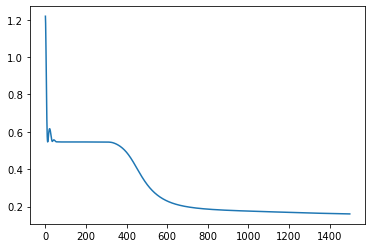


Confusion matrix for training:
tensor([[ 34.,   7.],
        [  2., 131.]])
Testing Accuracy: 90.00 %

Confusion matrix for testing:
tensor([[ 6.,  4.],
        [ 0., 30.]])


In [81]:
# store all losses for visualisation
all_losses = []

# train a neural network
for epoch in range(num_epochs):
    # Perform forward pass: compute predicted y by passing x to the model.
    Y_pred = net(X)

    # Compute loss
    loss = loss_func(Y_pred, Y)
    all_losses.append(loss.item())

    # print progress
    if epoch % 50 == 0:
        # convert three-column predicted Y values to one column for comparison
        _, predicted = torch.max(Y_pred, 1)

        # calculate and print accuracy
        total = predicted.size(0)
        correct = predicted.data.numpy() == Y.data.numpy()

        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%' % (epoch + 1, num_epochs, loss.data, 100 * sum(correct)/total))

    # Clear the gradients before running the backward pass.
    net.zero_grad()

    # Perform backward pass
    loss.backward()

    # Calling the step function on an Optimiser makes an update to its
    # parameters
    optimiser.step()

# Optional: plotting historical loss from ``all_losses`` during network learning
# Please uncomment me from next line to ``plt.show()`` if you want to plot loss

import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)
plt.show()

"""
Evaluating the Results

To see how well the network performs on different categories, we will
create a confusion matrix, indicating for every glass (rows)
which class the network guesses (columns).

"""

confusion = torch.zeros(n_output, n_output)

Y_pred = net(X)

_, predicted = torch.max(Y_pred, 1)

for i in range(train_data.shape[0]):
    actual_class = Y.data[i]
    predicted_class = predicted.data[i]

    confusion[actual_class][predicted_class] += 1

print('')
print('Confusion matrix for training:')
print(confusion)

"""
Step 3: Test the neural network

Pass testing data to the built neural network and get its performance
"""

# create Tensors to hold inputs and outputs
X_test = torch.Tensor(test_input.values).float()
Y_test = torch.Tensor(test_target.values).long()

# test the neural network using testing data
# It is actually performing a forward pass computation of predicted y
# by passing x to the model.
# Here, Y_pred_test contains three columns, where the index of the
# max column indicates the class of the instance
Y_pred_test = net(X_test)

# get prediction
# convert three-column predicted Y values to one column for comparison
_, predicted_test = torch.max(Y_pred_test, 1)

# calculate accuracy
total_test = predicted_test.size(0)
correct_test = sum(predicted_test.data.numpy() == Y_test.data.numpy())

print('Testing Accuracy: %.2f %%' % (100 * correct_test / total_test))

"""
Evaluating the Results

To see how well the network performs on different categories, we will
create a confusion matrix, indicating for every iris flower (rows)
which class the network guesses (columns).

"""

confusion_test = torch.zeros(n_output, n_output)

for i in range(test_data.shape[0]):
    actual_class = Y_test.data[i]
    predicted_class = predicted_test.data[i]

    confusion_test[actual_class][predicted_class] += 1

print('')
print('Confusion matrix for testing:')
print(confusion_test)

**Advanced Steps:**
1. We encourage you to experiment with different ways of accomplishing the task.
2. Explore the normalisation and pre-processing techniques discussed in the lectures and investigate its impact on the performance of the classification.
3. Investigate the performance of the neural network classification by changing the various characteristics of the neural network such as:
    * Number of neurons in each layer
    * Number of layers
    * Number of epochs
    * Learning rate

**Task 2: An advanced classification task in PyTorch**
Now we will work with a more complicated classification task, the original glass data set. Load the unmodified data set “glass.csv” into PyTorch and perform the same classification task as above.

**Q8. How many classes are you predicting now?**

**Q9. How will you represent these classes and how will you calculate the error of classification?**


In [101]:
# load all data
data = pd.read_csv('glass.data',  header=None)

# drop first column
data.drop(data.columns[0], axis=1, inplace=True)

# try shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# randomly split data into training set (80%) and testing set (20%)
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
test_data = data[~msk]

n_features = train_data.shape[1] - 1

# split training data into input and target
# the first 9 columns are features, the last one is target
train_input = train_data.iloc[:, :n_features]
train_target = train_data.iloc[:, n_features]

# split testing data into input and target
# the first 9 columns are features, the last one is target
test_input = test_data.iloc[:, :n_features]
test_target = test_data.iloc[:, n_features]

# create Tensors to hold inputs and outputs
X = torch.Tensor(train_input.values).float()
Y = torch.Tensor(train_target.values).long()
Y = Y-1

In [109]:
"""
Here we build a neural network with one hidden layer.
    input layer: 9 neurons, representing the features of Glass
    hidden layer: 10 neurons, using Sigmoid as activation function
    output layer: 7 neurons, representing the type of glass

The network will be trained with Stochastic Gradient Descent (SGD) as an
optimiser, that will hold the current state and will update the parameters
based on the computed gradients.

Its performance will be evaluated using cross-entropy.
"""
#TODO define the number of inputs, classes, training epochs, and learning rate
n_input = n_features
n_hidden = 10
n_output = 7
num_epochs = 1500
learning_rate = 0.01

#TODO define a customised neural network structure
class TwoLayerNet(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(TwoLayerNet, self).__init__()
        self.hidden = torch.nn.Linear(n_input, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        h_input = self.hidden(x)
        h_output = torch.relu(h_input)
        y_pred = self.out(h_output)
        return y_pred

#TODO define a neural network using the customised structure 
net = TwoLayerNet(n_input, n_hidden, n_output)

#TODO define loss function (https://pytorch.org/docs/stable/nn.html#loss-functions)
loss_func = nn.CrossEntropyLoss()

#TODO define optimiser (https://pytorch.org/docs/stable/optim.html)
optimiser = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.01)

In [110]:
print(Y)

tensor([1, 1, 4, 1, 1, 1, 4, 5, 1, 1, 1, 0, 5, 1, 1, 6, 0, 1, 0, 1, 1, 1, 2, 1,
        6, 0, 0, 1, 1, 1, 4, 0, 1, 6, 2, 0, 6, 0, 1, 1, 6, 5, 0, 6, 0, 1, 1, 2,
        2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        2, 1, 1, 6, 1, 0, 1, 1, 0, 2, 0, 6, 0, 0, 6, 0, 0, 2, 1, 2, 0, 6, 1, 1,
        0, 0, 0, 1, 6, 6, 0, 0, 0, 1, 6, 6, 1, 6, 2, 5, 1, 1, 5, 4, 1, 0, 1, 0,
        0, 6, 1, 6, 4, 1, 0, 1, 6, 0, 0, 4, 0, 1, 0, 0, 1, 1, 1, 0, 4, 2, 6, 1,
        6, 0, 5, 1, 1, 0, 0, 0, 1, 6, 0, 1, 0, 1, 4, 6, 1, 2, 2, 0, 0, 1, 4, 0,
        1, 1, 1, 6, 0, 0, 2, 1, 1, 2, 5, 6])


Epoch [1/1500] Loss: 1.5129  Accuracy: 37.22 %
Epoch [51/1500] Loss: 1.5129  Accuracy: 37.22 %
Epoch [101/1500] Loss: 1.5129  Accuracy: 37.22 %
Epoch [151/1500] Loss: 1.5129  Accuracy: 37.22 %
Epoch [201/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [251/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [301/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [351/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [401/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [451/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [501/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [551/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [601/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [651/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [701/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [751/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [801/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [851/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [901/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [951/1500] Loss: 1.5128  Accuracy: 37.22 %
Epoch [1001/1500] Loss:

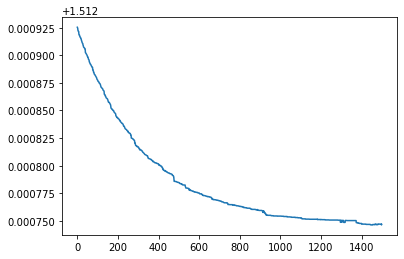

Testing Accuracy: 38.24 %


'\nEvaluating the Results\n\nTo see how well the network performs on different categories, we will\ncreate a confusion matrix, indicating for every iris flower (rows)\nwhich class the network guesses (columns).\n\n'

In [112]:
# store all losses for visualisation
all_losses = []

# train a neural network
for epoch in range(num_epochs):
    # Perform forward pass: compute predicted y by passing x to the model.
    Y_pred = net(X)

    # Compute loss
    loss = loss_func(Y_pred, Y)
    all_losses.append(loss.item())

    # print progress
    if epoch % 50 == 0:
        # convert three-column predicted Y values to one column for comparison
        _, predicted = torch.max(Y_pred, 1)

        # calculate and print accuracy
        total = predicted.size(0)
        correct = predicted.data.numpy() == Y.data.numpy()

        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%'
              % (epoch + 1, num_epochs, loss.data, 100 * sum(correct)/total))

    # Clear the gradients before running the backward pass.
    net.zero_grad()

    # Perform backward pass
    loss.backward()

    # Calling the step function on an Optimiser makes an update to its
    # parameters
    optimiser.step()
    
# Optional: plotting historical loss from ``all_losses`` during network learning
# Please uncomment me from next line to ``plt.show()`` if you want to plot loss

import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)
plt.show()

"""
Step 3: Test the neural network

Pass testing data to the built neural network and get its performance
"""

# create Tensors to hold inputs and outputs
X_test = torch.Tensor(test_input.values).float()
Y_test = torch.Tensor(test_target.values).long()

# test the neural network using testing data
# It is actually performing a forward pass computation of predicted y
# by passing x to the model.
# Here, Y_pred_test contains three columns, where the index of the
# max column indicates the class of the instance
Y_pred_test = net(X_test)

# get prediction
# convert three-column predicted Y values to one column for comparison
_, predicted_test = torch.max(Y_pred_test, 1)

# calculate accuracy
total_test = predicted_test.size(0)
correct_test = sum(predicted_test.data.numpy() == Y_test.data.numpy())

print('Testing Accuracy: %.2f %%' % (100 * correct_test / total_test))

"""
Evaluating the Results

To see how well the network performs on different categories, we will
create a confusion matrix, indicating for every iris flower (rows)
which class the network guesses (columns).

"""

#x